![](https://sun9-52.userapi.com/impf/8nK6th8Wj7aUaHco_kBrjwqWhQ7trpqtS-I6Pg/bJ5T00PE1TI.jpg?size=665x656&quality=96&sign=a93400213a6a31ae8c1e728f43573758&type=album)

# Глава 2. Машинное обучение для определения тональности текстов.

Говоря о компьютеризированной реализации анализа тональности текстов, нельзя не подумать о машинном обучении. Наиболее распространённые его классы: обучение на размеченных данных и обучение с учителем. К обоим этим классам относятся процессы, в которых, имея конечное число примеров, необходимо научить компьютер прогнозировать определённую величину для конкретного объекта. В задачах автоматизированной классификации текстов используются заранее размеченные корпусы данных – именно на них обучаются модели перед грядущим использованием.  
Но существуют и другие способы определения тональности текстов – например те, которые базируются на работе со словарями оценочной лексики (словарями тональности). Существует три основных типа таких способа:

* экспертный; 
* основанный на текстовых коллекциях; 
* основанный на тезаурусах (словарях). 

Экспертный метод подразумевает собой составление словаря экспертами (людьми) вручную. По понятным причинам этот способ сильно отличается от других: он очень трудоёмкий, поскольку исключается фактор автоматизации процесса, а также в нём велика вероятность отсутствия специальной лексики из определённых предметных областей – все их попросту не охватить. Но есть и преимущества: итоговый продукт окажется словарём с присвоенной ему тональностью высокого качества – такой словарь хоть и будет составлен медленно, но исключит в себе множественные погрешности, которые мог бы допустить компьютер, а человек их бы не заметил в силу огромного количества обработанных данных. 
Способ, основывающийся на текстах, по которым в итоге составляются словари, подразумевает статистический анализ размеченных текстовых данных. Подобные коллекции текстов имеют отношение к тем предметным областям, в которых и составляются словари. Данный подход уменьшает шанс отсутствия уникальных терминов из заданной предметной области. Но стоит помнить, что в таком случае качество итогового словаря тональности прямо зависит от качества изначально размеченных текстов. 

Наконец, при способе, основанном на тезаурусах, полученный на вход список слов пополняется за счёт привлечения новых словарей. К таким дополнительным словарям можно отнести коллекции позитивно окрашенных слов, негативно окрашенных, антонимов, синонимов и т.д. Недостатком данного метода является сложность в вопросах сохранения и корректного поддержания связей составляемых словарей с изначально заданной предметной областью.

Проанализировав преимущества и недостатки методов анализа тональности текстов, основанных на машинном обучении или на словарях тональности, а также приняв во внимание тему выпускной квалификационной работы, было принято решение сделать выбор в пользу первого метода – основанного на машинном обучении. В качестве альтернативы словарям тональности в следующей главе будет обзорно рассмотрена работа модуля Word2Vec –  совокупности моделей, которые предназначены для векторного представления слов на естественном языке. 



# 2.1.  Импортирование библиотек и описательная статистика.


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import seaborn as sns

import pandas as pd 
from sklearn.model_selection import train_test_split,  cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, make_scorer, recall_score
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word

import warnings
from time import time
from scipy.stats import randint as sp_randint
import matplotlib
from scipy.stats import norm
from scipy.stats.kde import gaussian_kde
from numpy import linspace,hstack
from pylab import plot,show,hist

import re
import pickle

import seaborn as sns
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from nltk.stem import WordNetLemmatizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from nltk import word_tokenize
from nltk.corpus import stopwords

from gensim.models import Word2Vec, Phrases

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences

Подгружаем данные в Jupyter Notebook:

In [ ]:
DS = pd.read_excel("text_rating_final.xlsx")

Приготовимся к описанию нашего дата-сета; для начала выведем несколько первых и последних строк с целью убедиться, что набор данных считался и готов к работе.

In [ ]:
DS.head()

,Comment,Rate
0,"Не рациональная системность, а интуитивный поз...",0
1,"Когда возникнут трудности, они тебе не помогут...",0
2,Кривая национализация это политический компром...,-1
3,Такой вид биологического оружия не действует н...,-2
4,В Эль-Кусейре /к западу от Хомса/ сирийские по...,0


In [ ]:
DS.tail()

,Comment,Rate
32432,Это помогло Соединенным Штатам прорубить окно ...,0
32433,Она уже вернулась на УИК. Член ПСГ Строгин от ...,-2
32434,Всего было две линии обороны: в первую входили...,-1
32435,5. Западный образ жизни несовместим с выживани...,-2
32436,Оригинал взят у в Светлая память - защитнику О...,0


У нас имеются два атрибута - категориальный "Comment" со всеми многочисленными мнениями пользователей соцсетей, а также численный признак - Rate, оценка тональности мнения.

In [ ]:
percent_neutral= DS[DS['Rate'] == 0]
percent_neutral_1 = np.round(len(percent_neutral)/len(DS)*100,3)
print("Процент нейтральных мнений:", percent_neutral_1,"%")

Процент нейтральных мнений: 52.311 %


### Для наглядности построим круговую диаграмму, которая покажет соотношение трёх типов тональности наиболее подробно:

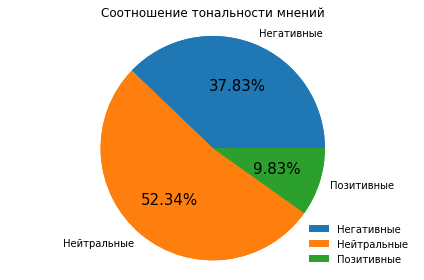

In [ ]:
labels = ['Негативные', 'Нейтральные', "Позитивные"]
value = [DS[DS['Rate'] == -1]['Rate'].count()+
         DS[DS['Rate'] == -2]['Rate'].count(),DS[DS['Rate'] == 0]['Rate'].count(),DS[DS['Rate'] == 1]['Rate'].count()+
         DS[DS['Rate'] == 2]['Rate'].count()]
value = pd.Series(value)
fig, ax = plt.subplots()
ax.pie(value, labels=labels)
value.plot(kind='pie', labels=['', '', ''],
                                   ax=ax, autopct='%.2f%%', fontsize=15)
ax.set_title(u'Соотношение тональности мнений')
ax.axis('equal')
ax.legend(labels=[u'Негативные', u'Нейтральные', u'Позитивные'], framealpha = 0)
ax.set_ylabel('')
plt.tight_layout()

###  Общая информация о дата-сете:

In [ ]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32437 entries, 0 to 32436
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  32406 non-null  object
 1   Rate     32424 non-null  object
dtypes: object(2)
memory usage: 507.0+ KB


### Количество строк и столбцов в дата-сете соответственно:

In [ ]:
DS.shape

(32437, 2)

###  Тип данных каждого поля, шкала каждого поля:

In [ ]:
DS.dtypes

Comment    object
Rate       object
dtype: object

###  Количество уникальных значений для каждого атрибута:

In [ ]:
DS.nunique() 

Comment    20381
Rate           6
dtype: int64

Помним, что значений в Rate не может быть больше пяти исходных (-2; -1; 0; 1; 2). Значит, в данных затесались лишние значения, от которых необходимо почистить столбец.

###  Количество отсутствующих значений для каждого поля:

In [ ]:
len(DS) - DS.count()

Comment    31
Rate       13
dtype: int64

###  То же самое, но в процентном представлении:

In [ ]:
(DS.isna().sum(axis=0)/len(DS)).sort_values()

Rate       0.000401
Comment    0.000956
dtype: float64

# 2.2. Предобработка данных.

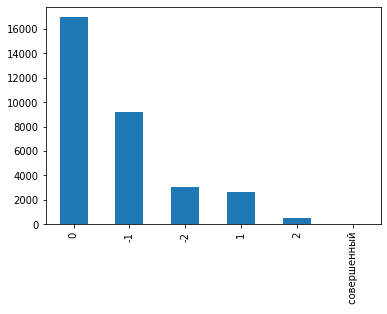

In [ ]:
DS['Rate'].value_counts().plot.bar()

* Видим, что данные содержат мусор, из-за которого столбец не может считаться численным. Очистим датафрейм от этого.
*Также избавимся от тех текстов, чья тональность была оценена как нейтральная (Rate = 0), поскольку в работе будут построены модели, основанные на принципе бинарной классификации. 
*Теперь 0 обозначает негативную тональность. Значения -2 и -1 объединены, так же, как и 1 и 2.

In [ ]:
threshold = [" совершенный", 0]
DS = DS.query("Rate != @threshold")

In [ ]:
DS.loc[(DS.Rate < 0), 'Rate'] = 0
DS.loc[(DS.Rate > 0), 'Rate'] = 1
print(DS)

                                                 Comment Rate
2      Кривая национализация это политический компром...    0
3      Такой вид биологического оружия не действует н...    0
6      бактериофобия, верминофобия, вермифобия, гельм...    0
8      Президент Сирии также ответил на обвинения в а...    0
12     Великий писатель беспрестанно доказывал несост...    1
...                                                  ...  ...
32426  Сейчас говорят, что собираются снова переподчи...    0
32429  Жертвами атак боевиков стали четыре военнослуж...    0
32433  Она уже вернулась на УИК. Член ПСГ Строгин от ...    0
32434  Всего было две линии обороны: в первую входили...    0
32435  5. Западный образ жизни несовместим с выживани...    0

[15465 rows x 2 columns]


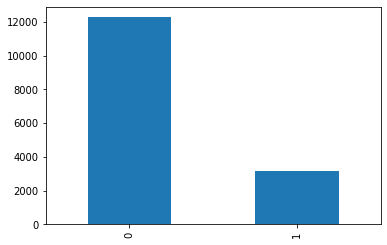

In [ ]:
DS['Rate'].value_counts().plot.bar()

In [ ]:
DS['Rate'] = DS['Rate'].apply(pd.to_numeric) 
DS.dtypes

Comment     object
Rate       float64
dtype: object

Создадим индикатор для признаков с пропущенными данными, а затем на основе индикатора построим гистограмму.


created missing indicator for: Comment
created missing indicator for: Rate


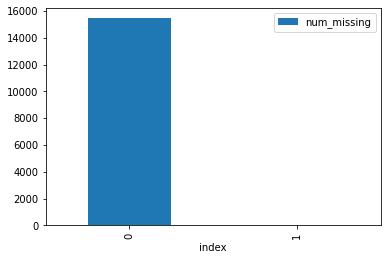

In [ ]:
for col in DS.columns:
    missing = DS[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        DS['{}_ismissing'.format(col)] = missing


ismissing_cols = [col for col in DS.columns if 'ismissing' in col]
DS['num_missing'] = DS[ismissing_cols].sum(axis=1)

DS['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [ ]:
print('Количество строк в датасете до очистки: ', len(DS))
print('Суммарное количество отсутсвующих значений (Nan) в датасете: ', (len(DS) - DS.count()).sum())
print('Таким образом, после очистки пропущенных значений в датасете должно остаться', len(DS) - ((len(DS) - DS.count()).sum()), "строк")

Количество строк в датасете до очистки:  15465
Суммарное количество отсутсвующих значений (Nan) в датасете:  14
Таким образом, после очистки пропущенных значений в датасете должно остаться 15451 строк


### Отбрасываем строки с пропусками:


In [ ]:
ind_missing = DS[DS['num_missing'] > 0].index # если количество пропусков больше нуля
DS_less_missing_rows = DS.drop(ind_missing, axis=0,inplace=True)
DS

,Comment,Rate,Comment_ismissing,Rate_ismissing,num_missing
2,Кривая национализация это политический компром...,0.0,False,False,0
3,Такой вид биологического оружия не действует н...,0.0,False,False,0
6,"бактериофобия, верминофобия, вермифобия, гельм...",0.0,False,False,0
8,Президент Сирии также ответил на обвинения в а...,0.0,False,False,0
12,Великий писатель беспрестанно доказывал несост...,1.0,False,False,0
...,...,...,...,...,...
32426,"Сейчас говорят, что собираются снова переподчи...",0.0,False,False,0
32429,Жертвами атак боевиков стали четыре военнослуж...,0.0,False,False,0
32433,Она уже вернулась на УИК. Член ПСГ Строгин от ...,0.0,False,False,0
32434,Всего было две линии обороны: в первую входили...,0.0,False,False,0


Удалим те логические атрибуты, которые требовались нам ранее для очистки данных.

In [ ]:
del DS['Comment_ismissing']
del DS['Rate_ismissing']
del DS['num_missing']
DS

,Comment,Rate
2,Кривая национализация это политический компром...,0.0
3,Такой вид биологического оружия не действует н...,0.0
6,"бактериофобия, верминофобия, вермифобия, гельм...",0.0
8,Президент Сирии также ответил на обвинения в а...,0.0
12,Великий писатель беспрестанно доказывал несост...,1.0
...,...,...
32426,"Сейчас говорят, что собираются снова переподчи...",0.0
32429,Жертвами атак боевиков стали четыре военнослуж...,0.0
32433,Она уже вернулась на УИК. Член ПСГ Строгин от ...,0.0
32434,Всего было две линии обороны: в первую входили...,0.0


In [ ]:
Comment, Rate = list(DS['Comment']), list(DS['Rate'])

Стоит заметить, что сфера работы находится в границах Natural Language Processing (NLP) — одного из направлений искусственного интеллекта, которое работает с анализом, пониманием и генерацией живых языков с целью взаимодействовать с компьютерами, используя естественные языки вместо компьютерных. 

На следующем этапе необходимо провести векторизацию текстовых данных. Однако прежде чем преобразовать слова в числа, их следует обработать специальными способами, которые предлагают Python-библиотеки pymorphy2 и NLTK. среди них можно перечислить удаление стоп-слов, нормализацию, стемминг и лемматизацию.

# NLP-ОПЕРАЦИИ ДЛЯ ОБРАБОТКИ ТЕКСТА:

In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 8.2 MB 7.5 MB/s 


In [ ]:
pip install pymorphy2[fast]

     |████████████████████████████████| 371 kB 5.1 MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp37-cp37m-linux_x86_64.whl size=844276 sha256=35597a79260a7c379f51f819a5e8ed56e398d27ba6c00553cfce60aed440b4e0
  Stored in directory: /root/.cache/pip/wheels/85/51/a4/2de41ff197786537075027c27b479a38da92f50abc86634445
Successfully built DAWG


In [ ]:
pip install -U pymorphy2-dicts-ru

In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
import os
import requests
from pathlib import Path
import nltk
from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
import pymorphy2
from collections import Counter

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

1.	Исключение стоп-слов из текстовых данных.

Всегда бывает так, что некоторых слов в тексте больше, чем каких-то других. Речь идёт о таких словах, которые встречаются почти в каждом предложении и в общем-то не несут информационной нагрузки. Подобные текстовые единицы – шум, который именуется стоп-словами. 
Была написана функция get_text, которая предназначена для чтения текстовых данных –  в нашем случае это список стоп-слов со специального ресурса на GitHub, а также все предложения из исходного датасета.
 
При необходимости список стоп-слов можно дополнять любыми другими словами, которые покажутся лишними в процессе работы. Так как объект stopwords_ru является списком, то в него свободно можно добавлять (а также удалять из него) слова при помощи функции append().


In [ ]:
url_stopwords_ru = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt"

def get_text(url, encoding='utf-8', to_lower=True):
    url = str(url)
    if url.startswith('http'):
        r = requests.get(url)
        if not r.ok:
            r.raise_for_status()
        return r.text.lower() if to_lower else r.text
    elif os.path.exists(url):
        with open(url, encoding=encoding) as f:
            return f.read().lower() if to_lower else f.read()
    else:
        raise Exception('parameter [url] can be either URL or a filename')

In [ ]:
stopwords_ru = get_text(url_stopwords_ru).splitlines()

In [ ]:
#import nltk
#nltk.download('stopwords')

In [ ]:
#from nltk.corpus import stopwords
#stopwordlist = stopwords.words("russian")
#stopwordlist

2.	Стеммизация (стемминг).

Ещё со школы все мы помним и знаем, насколько русский язык обширен и богат с точки зрения морфологии. К примеру, прилагательные "замечательный" и "замечательная" - слова идентичного смысла, но различной морфологической структуры (просклонены по двум разным родам). Но в машинном обучении вопрос минимизации данных и их очищения всегда стоит довольно остро; поэтому имеет смысл привести подобные слова к одной форме для уменьшения размерности.
Одним из способов сделать это можно назвать стемминг (stemming). Его суть заключается в отделении от слова окончаний, тем самым оставляя от слов лишь основу. В Python-библиотеке «NLTK» для этого существует метод «Snowball Stemmer» с поддержкой русского языка.



In [ ]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language="russian")

In [ ]:
snowball.stem("Замечательный")

'замечательн'

3.	Лемматизация.

Метод лемматизации позволяет приводить слова к своей начальной морфологической форме. Например, "вижу", "видят" имеют начальную форму "видеть". С реализацией данного метода в Python нам поможет библиотека pymorphy2, которая является специально написанным для морфологического анализа русского языка инструментом.
Существует метод «parse», который возвращает список обозначающих некоторые важные грамматические формы анализируемых нами слов. Рассмотрим подробнее атрибуты данного метода:
* tag –  морфологический разбор слова. Определяет часть речи, вид, переходность, число, лицо, время и наклонение;
* normal_form — инфинитив слова, его изначальная форма;
* 	score — правильность морфологического разбора в процентах.

По понятным причинам нам больше всех нужен атрибут normal_form. Так как объекты метода сортируются в порядке убывания значения score, то нам необходимо взять самый первый элемент (под нулевым индексом).



In [ ]:
morph.parse("видят")[0].normal_form

'видеть'

In [ ]:
morph.parse("вижу")[0].normal_form

'видеть'

In [ ]:
morph.parse("видим")[0].normal_form

'видеть'


В результате принято решение отказаться от стемминга в пользу лемматизации. Последняя является более предпочтительным способом морфологического анализа. В отличие от стеммизации она не отрубает от слов окончания, превращая эти самые слова в бессмысленные в лингвистическом смысле объекты. Специальный инструмент, который работает на основе словарей русского языка, подходит для нашей работы больше, поскольку позволяет получить одно слово из разных его форм, в то же время не травмируя исходное слово.

**Процесс предобработки**

Пришло время для написанию функции, которая позволит предобработать текстовые данные, задействуя при этом вышеперечисленные и изученные способы. Помимо них, функция preprocess также ставит все слова в нижний регистр, превращает ссылки в нейтральное "URL" и заменяет 3 одинаковых символа подряд на 2.

In [ ]:
import re
from pymorphy2 import MorphAnalyzer

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"
    
morph = MorphAnalyzer()

def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    doc = doc.lower()
    # Заменяем все ссылки на 'URL':
    doc = re.sub(urlPattern,' URL', doc)      
    # Заменяем 3 одинаковых символа подряд на 2:
    doc = re.sub(sequencePattern, seqReplacePattern, doc)
    pattern = r'[^а-яА-ЯёЁa-zA-Z0-9]'
    pattern_1 = r'[A-Za-z0-9_]'
    doc = re.sub(pattern,' ', doc)
    doc = re.sub(pattern_1,' ',doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

In [ ]:
data = DS['Comment'].apply(lemmatize)

In [ ]:
data = data.dropna()
data

2        [кривая, национализация, политический, компром...
3        [биологический, оружие, действовать, наверняка...
6        [бактериофобия, верминофобия, вермифобия, гель...
8        [президент, сирия, ответить, обвинение, адрес,...
12       [великий, писатель, беспрестанно, доказывать, ...
                               ...                        
32426    [говорить, собираться, переподчинить, главное,...
32429    [жертва, атака, боевик, стать, военнослужащий,...
32433    [вернуться, уик, член, псг, строгин, яблоко, п...
32434    [линия, оборона, первый, входить, сооружение, ...
32435    [западный, образ, жизнь, несовместимый, выжива...
Name: Comment, Length: 15445, dtype: object

In [ ]:
from collections import defaultdict

word_freq = defaultdict(int)
for tokens in data.iloc[:]:
    for token in tokens:
        word_freq[token] += 1

Можем взглянуть на количество уникальных слов и на список из 10 самых повторяющихся слов:

In [ ]:
len(word_freq)

54966

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['боязнь',
 'аль',
 'боевик',
 'район',
 'город',
 'сирийский',
 'террорист',
 'сирия',
 'страна',
 'армия']

In [ ]:
def preprocess(textdata):
    processedText = []
  
    # Инициализируем паттерны для нормализации:
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    pattern=r'[^а-яА-ЯёЁa-zA-Z0-9]'
    pattern_1=r'[A-Za-z0-9_]'
    patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"


    for comment in textdata:
        comment = comment.lower()
        # Заменяем все ссылки на 'URL':
        comment = re.sub(urlPattern,' URL', comment)      
        # Заменяем 3 одинаковых символа подряд на 2:
        comment = re.sub(sequencePattern, seqReplacePattern, comment)
        comment = re.sub(patterns, ' ', comment) 
        comment=re.sub(pattern,' ',comment)
        comment=re.sub(pattern_1,' ',comment)
        commentwords = ''
        for word in comment.split():
            # Проверяем, есть ли слово в списке стоп-слов:
            if word not in stopwords_ru:
              if len(word)>1:
                # Лемматизация слов.
                #word = wordLemm.lemmatize(word)
                word = morph.parse(word)[0].normal_form
                # Стемминг слов (не используем)
                #word = snowball.stem(word)
                commentwords += (word+' ')
            
        processedText.append(commentwords)
        
    return processedText

Для осуществления нормализации исходного текста была написана функция remove_special_characters, которая на основе специальных паттернов очистила строки в атрибуте «Comment» от ссылок, специальных символов, повторяющихся символов, чисел и английских букв (так как наши данные преимущественно русскоязычные и изначально ориентированы на русский язык). Также текст был целиком приведен к нижнему регистру. 

In [ ]:
def remove_special_characters(text, remove_digits=True):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    text = text.lower()
    # Заменяем все ссылки на 'URL':
    text = re.sub(urlPattern,' URL', text)      
    # Заменяем 3 одинаковых символа подряд на 2:
    text = re.sub(sequencePattern, seqReplacePattern, text)
    pattern=r'[^а-яА-ЯёЁa-zA-Z0-9]'
    pattern_1=r'[A-Za-z0-9_]'
    text=re.sub(pattern,' ',text)
    text=re.sub(pattern_1,' ',text)
    return text

In [ ]:
processedtext=DS['Comment'].apply(remove_special_characters)

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import time
t = time.time()
processedtext = preprocess(DS['Comment'])
print(f'Предобработка текста завершена.')
print(f'Потрачено времени: {round(time.time()-t)} секунд')

Предобработка текста завершена.
Потрачено времени: 73 секунд


Конвертируем список предложений в единый текст

In [ ]:
processedtext_str = " ".join(processedtext)

In [ ]:
url_stopwords_ru = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt"

def get_text(url, encoding='utf-8', to_lower=True):
    url = str(url)
    if url.startswith('http'):
        r = requests.get(url)
        if not r.ok:
            r.raise_for_status()
        return r.text.lower() if to_lower else r.text
    elif os.path.exists(url):
        with open(url, encoding=encoding) as f:
            return f.read().lower() if to_lower else f.read()
    else:
        raise Exception('parameter [url] can be either URL or a filename')


def normalize_tokens(tokens):
    morph = pymorphy2.MorphAnalyzer()
    return [morph.parse(tok)[0].normal_form for tok in tokens]


def remove_stopwords(tokens, stopwords=None, min_length=4):
    if not stopwords:
        return tokens
    stopwords = set(stopwords)
    tokens = [tok
              for tok in tokens
              if tok not in stopwords and len(tok) >= min_length]
    return tokens


def tokenize_n_lemmatize(
    text, stopwords=None, normalize=True, 
    regexp=r'(?u)\b\w{4,}\b'):
    words = [w for sent in sent_tokenize(text)
             for w in regexp_tokenize(sent, regexp)]
    if normalize:
        words = normalize_tokens(words)
    if stopwords:
        words = remove_stopwords(words, stopwords)
    return words

stopwords_ru = get_text(url_stopwords_ru).splitlines()

text = processedtext_str
words = tokenize_n_lemmatize(text, stopwords=stopwords_ru)

In [ ]:
from collections import Counter
Counter(words).most_common(20)

[('боязнь', 29054),
 ('боевик', 6349),
 ('район', 5917),
 ('сирийский', 4540),
 ('террорист', 4455),
 ('сирия', 4356),
 ('армия', 3996),
 ('военный', 3716),
 ('оружие', 3662),
 ('уничтожить', 3587),
 ('группировка', 3284),
 ('провинция', 2696),
 ('результат', 2620),
 ('российский', 2510),
 ('являться', 2427),
 ('государство', 2394),
 ('дамаск', 2324),
 ('число', 2198),
 ('находиться', 2142),
 ('войско', 2091)]

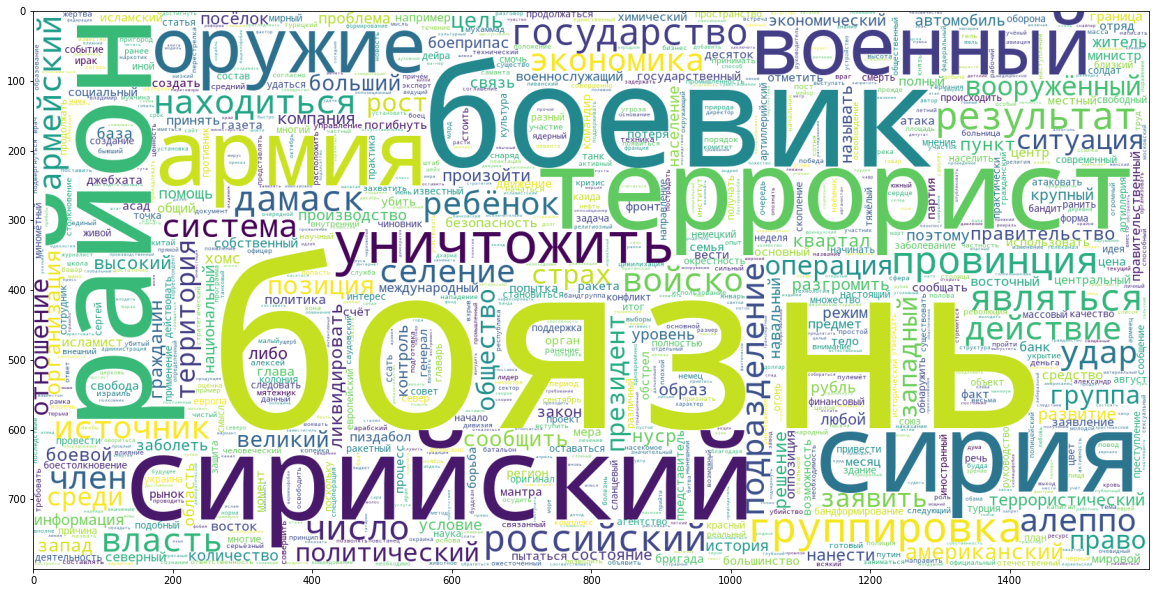

In [ ]:
data_neg = words
plt.figure(figsize = (20,20))
wc = WordCloud(background_color="white", max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
columns = 'Comment Rate'.split()
x_1 = pd.DataFrame(DS, columns = columns)
y = DS.Rate
y

2        0.0
3        0.0
6        0.0
8        0.0
12       1.0
        ... 
32426    0.0
32429    0.0
32433    0.0
32434    0.0
32435    0.0
Name: Rate, Length: 15451, dtype: float64

# 2.3. Разделение набора данных на обучающую и тестовую выборки.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, y, test_size = 0.2, random_state = 0) 
print(f'Разбиение данных прошло успешно.')

Разбиение данных прошло успешно.


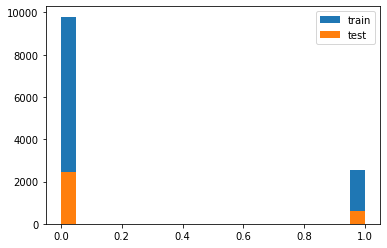

In [ ]:
plt.hist(y_train, bins=20, label='train')
plt.hist(y_test, bins=20, label='test')
plt.legend()
plt.show()

In [ ]:
print("TRAIN size:", len(X_train)+len(y_train))
print("TEST size:", len(y_train)+len(y_test))

TRAIN size: 24720
TEST size: 15451


Далее была проведена векторизация данных при помощи TF-IDF Vectorizer.
Данный инструментарий по определению — подход из сферы статистики, использующийся в решении задач по оцениванию контекстной важности слова внутри документа/корпуса слов, участвующих в анализе. Основной тезис данного подхода гласит, что вес конкретного слова пропорционален частоте его употребления в тексте, а также обратно пропорционален частоте употребления данного слова во всей коллекции текстов. 

TF-IDF определяет важность каждого слова с целью проанализировать текстовый документ или любой другой обрабатываемый текст в датасете. Разобраться в работе данного инструмента можно на следующем практическом примере: допустим, у нас имеется набор данных, состоящий из сочинений школьников на тему "Мой дом". В таком датасете слово "дом" может появляться множество раз; это часто встречающееся слово в сравнении с другими словами в датасете. Набор данных содержит и другие слова. Например, "квартира", "комнаты" и т.д., но они уже встречаются реже, а поэтому их частота встречаемости ниже. Следовательно, они несут в себе больше информации, нежели слово "дом". Такова логика инструмента TF-IDF.

Векторизация при помощи "TF-IDF Vectorizer" конвертирует набор необработанных текстовых данных в матрицу "TF-IDF features". Vectorizer обычно обучается только лишь на наборе данных X_train.


In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=560000)
vectoriser.fit(X_train)
print(f'Векторизация прошла успешно.')
print('Количество слов: ', len(vectoriser.get_feature_names()))

Векторизация прошла успешно.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Количество слов:  549791


In [ ]:
xx1 = X_train
xx2 = X_test  

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Данные успешно трансформированы.')

Данные успешно трансформированы.


# 2.4. Обучение моделей для решения выбранной задачи.

Построим **9 моделей** для решения нашей задачи по анализу тональности текстов.

* Алгоритм наивного байесовского классификатора: 
Бернулли (BernoulliNB)
* Метод Опорных Векторов (LinearSVC) 
* Логистическая регрессия (Logistic Regression) 
* Мешок слов (Bag of Words) 
* Модель Term Frequency-Inverse Document Frequency (TFIDF)
* Мешок слов, оснащённая стохастическим градиентным спуском (SGDClassifier )
* Модель TFIDF, оснащённая стохастическим градиентным спуском (SGDClassifier )
* Дерево решений (Decision Tree Classifier) 
* Случайный лес (Random Forest Classifier)


Оценочной метрикой выберем показатель **"accuracy"**  — долю правильных ответов алгоритма. Для оценки качества работы алгоритма также введём метрики **precision** (точность) и **recall** (полнота). Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Чтобы получить максимально подробную информацию по работе модели, имеет смысл выводить классификационные отчёты **(classification_report)**. 

И перед переходом к анализу метрик необходимо использовать важную концепцию для описания этих метрик в терминах ошибок классификации, а именно — **confusion matrix** (матрицу ошибок), которая имеет следующий вид:

![вид матрицы ошибок](https://sun9-24.userapi.com/BUpDzkAT__m1qptu5UFb6C60IAGpDND8ACsrfg/phRujTtXcwE.jpg "вид матрицы ошибок")

Здесь **ŷ** — это ответ алгоритма на объекте, а **y** — истинная метка класса на этом объекте.
Таким образом, ошибки классификации бывают двух видов: False Negative (FN) и False Positive (FP).

In [ ]:
def model_Evaluate(model):
    
    # Предсказание значений для тестовой выборки:
    y_pred = model.predict(X_test)

    # Вывод классификационный отчёта
    print(classification_report(y_test, y_pred))
    
    # Вычисление и построение матрицы ошибок:
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Предсказанные значения", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Реальные значения"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("МАТРИЦА ОШИБОК", fontdict = {'size':18}, pad = 20)

 ## 2.4.1. Алгоритм наивного байесовского классификатора: Бернулли (BernoulliNB)

Наивные методы Байеса — это набор алгоритмов контролируемого обучения, основанных на применении теоремы Байеса с «наивным» предположением об условной независимости между каждой парой характеристик при заданном значении переменной класса. 

Было решено использовать метод BernoulliNB, который реализует простые байесовские алгоритмы обучения и классификации данных, распределяя их согласно многомерному распределению Бернулли; то есть может быть несколько функций, но предполагается, что каждая из них является двоичной переменной. Следовательно, этот класс требует, чтобы образцы были представлены как векторы признаков с двоичными значениями; если переданы данные любого другого типа, BernoulliNB экземпляр может преобразовать свой ввод в двоичную форму (в зависимости от binarize параметра).

В нашем случае классификации текста для обучения и использования этого классификатора могут использоваться векторы появления слов (а не векторы подсчета слов). BernoulliNB может работать лучше с некоторыми наборами данных, особенно с более короткими документами. 

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      2468
         1.0       0.70      0.07      0.13       623

    accuracy                           0.81      3091
   macro avg       0.75      0.53      0.51      3091
weighted avg       0.79      0.81      0.74      3091



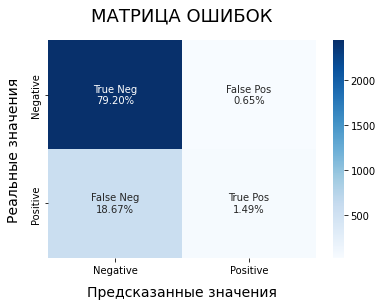

In [ ]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

#### Оценка точности на обучающей выборке:

In [ ]:
BNB_score_train = display(BNBmodel.score(X_train, y_train))

0.8140776699029126

Преимущества: 
* высокий показатель скорости функционирования алгоритма; 
* нетрудная программная реализация; 
* доступная интерпретируемость результатов работы модели. 

Недостатки: 
* неудовлетворительный показатель качества классификации;
* отсутствие учёта зависимости результатов классификации от сочетания признаков.


 ## 2.4.2. Метод Опорных Векторов (LinearSVC)

Метод Опорных Векторов является линейным алгоритмом, который используется в решении задач классификации и регрессии. Этот метод имеет широкое распространение в вопросах машинного обучения, поскольку он используется в решении задач линейного и нелинейного плана. Концепция работы опорных векторов заключается в том, что алгоритмом создаётся линия/гиперплоскость, с помощью которых данные разделяются на классы.

Преимущества:
* Метод является эффективным при использовании в пространствах большого размера и в случаях, когда число измерений оказывается выше числа образцов.
*  Из соображения эффективности в плане использования памяти, алгоритм использует в себе подмножество обучающих точек в функции принятия решений;
* Алгоритм универсален в использовании в задачах различного толка.

Недостатки: 
* параметры метода трудно интерпретировать;
* 	модель довольно неустойчива к выбросам в исходных наборах данных. 


              precision    recall  f1-score   support

         0.0       0.88      0.94      0.90      2468
         1.0       0.65      0.47      0.55       623

    accuracy                           0.84      3091
   macro avg       0.76      0.70      0.73      3091
weighted avg       0.83      0.84      0.83      3091



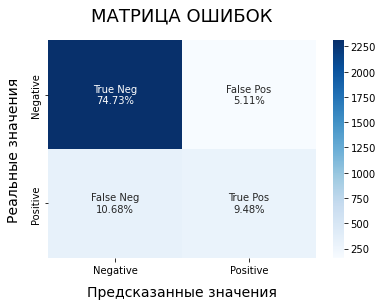

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

#### Оценка точности на обучающей выборке:

In [ ]:
SVC_score_train = display(SVCmodel.score(X_train, y_train))

0.9486245954692557

 ## 2.4.3. Логистическая регрессия (Logistic Regression)

Логистическая регрессия является моделью машинного обучения, которая используется для решения задач классификации, что делает её очередным подходящим нашей работе кандидатом. 
Задачи, в которых применяется метод логистической регрессии, должны иметь строго две категории. Иными словами, должны быть задачами двоичной классификации. Разным категориям назначаются 0 и 1 соответственно.


              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      2468
         1.0       0.74      0.35      0.47       623

    accuracy                           0.84      3091
   macro avg       0.80      0.66      0.69      3091
weighted avg       0.83      0.84      0.82      3091



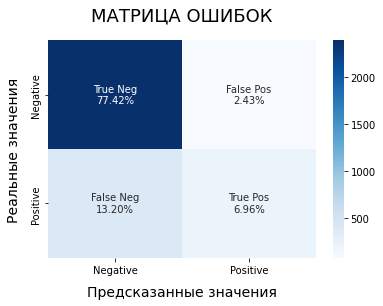

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

#### Оценка точности на обучающей выборке:

In [ ]:
LRmodel_score_train = display(LRmodel.score(X_train, y_train))

0.8984627831715211

Преимущества:
* модель выступает одним из наиболее эффективных методов; 
* алгоритм оснащён довольно простой программной реализацией.

Недостатки:
* трудно интерпретируются параметры модели;
* алгоритм неустойчив по отношению к выбросам в исходных наборах данных.


 ## 2.4.4. Мешок слов (bag of words) и модель "Term Frequency-Inverse Document Frequency (TFIDF)"

«Мешок слов» является упрощенным представлением, которое используется в процессе обработки естественного языка (NLP) и при поиске информации. В данной модели текстовые данные представляются как мультимножества слов, из которых они состоят; порядок текстовых единиц и грамматика не играют тут роли, но множественность сохраняется.

Метод обычно испoльзуeтся в задачах классификации документов, где частота появления каждого слова используется как признак для обучения исходного классификатора. Он довольно успешно применяется в решении задач моделирования языка и классификации документов различных типов.


In [ ]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews=cv.fit_transform(xx1)
cv_test_reviews=cv.transform(xx2)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (12360, 756560)
BOW_cv_test: (3091, 756560)


Модель "Term Frequency-Inverse Document Frequency model (TFIDF)"

In [ ]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews=tv.fit_transform(xx1)
tv_test_reviews=tv.transform(xx2)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (12360, 756560)
Tfidf_test: (3091, 756560)


Бинаризуем матрицу меток

In [ ]:
lb=LabelBinarizer()

sentiment_data=lb.fit_transform(DS['Rate'])
print(sentiment_data.shape)

(15451, 1)


Разбиваем данные об эмоциональной окраске на обучающую и тестовую выборки:

In [ ]:
#разбиваем данные по тональности
train_sentiments=sentiment_data[:12360]
test_sentiments=sentiment_data[12360:]
print(train_sentiments)
print(test_sentiments)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
#обучение модели
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

lr_bow=lr.fit(cv_train_reviews,train_sentiments.ravel())
print(lr_bow)

lr_tfidf=lr.fit(tv_train_reviews,train_sentiments.ravel())
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


В TF-IDF наибольший вес имеют те слова, которые чаще всего встречаются в пределах одного текста, и которые реже всего встречается в остальных документах.

Также была предпринята попытка модернизировать данные методы при помощи стохастического градиентного спуска – таким образом, класс «SGDClassifier» реализовал нетрудный процесс обучения, который поддерживал функции потерь и штрафы за классификацию. Данная процедура оказалась эквивалентна линейному SVM (методу опорных векторов), который мы уже рассматривали ранее.


In [ ]:
#обучение linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#обучение + применение модели svm к bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments.ravel())
print(svm_bow)
#обучение + применение модели svm к tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments.ravel())
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


 ## 2.4.5. Дерево решений (Decision Tree Classifier) и Случайный лес (Random Forest Classifier)

Дерево решений является методом прогнозного моделирования, которое применяется во множестве предметных областей различного толка. Обычно они строятся с помощью подхода, определяющего способы разделения набора данных на основе разных признаков и условий. Деревья решений – это непараметрический метод обучения с учителем, который используется в задачах регрессии и классификации. Цель данного метода состоит в том, чтобы создать модель, которая предскажет значение целевой переменной на основе изучения простых правил принятия решений, полученных из характеристик данных.

Преимущества: 
* довольно простая реализация алгоритма; 
* легко интерпретируемые результаты работы. 

Недостатки: 
* алгоритм неустойчив к выбросам в исходных наборах данных;
* для получения наиболее точных результатов, необходима работа с большими объёмами данных.

Случайный лес — один из самых универсальных методов классификации. Его главное преимущество в том, что он применяется в весьма широком спектре практических задач. Помимо этого, существуют особые Random Forest модели, которые используются для решения задач классификации, регрессии и кластеризации. Это как раз попадает под контекст нашей задачи анализа тональности текстов. 


In [ ]:
DS_new = pd.DataFrame(np.array(processedtext))
DS_new['Comment']=DS_new
del DS_new[0]
DS_new

,Comment
0,кривая национализация политический компромисс ...
1,биологический оружие действовать наверняка при...
2,бактериофобия верминофобия вермифобия гельминт...
3,президент сирия ответить обвинение адрес админ...
4,великий писатель беспрестанно доказывать несос...
...,...
15446,говорить собираться переподчинить главное упра...
15447,жертва атака боевик стать военнослужащий получ...
15448,вернуться уик член псг строгин яблоко полиция ...
15449,линия оборона первый входить сооружение грэс г...


In [ ]:
DS_new['Rate'] = Rate
DS_new

,Comment,Rate
0,кривая национализация политический компромисс ...,0.0
1,биологический оружие действовать наверняка при...,0.0
2,бактериофобия верминофобия вермифобия гельминт...,0.0
3,президент сирия ответить обвинение адрес админ...,0.0
4,великий писатель беспрестанно доказывать несос...,1.0
...,...,...
15446,говорить собираться переподчинить главное упра...,0.0
15447,жертва атака боевик стать военнослужащий получ...,0.0
15448,вернуться уик член псг строгин яблоко полиция ...,0.0
15449,линия оборона первый входить сооружение грэс г...,0.0


In [ ]:
train,test = train_test_split(DS_new, test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(xx1)
test_features=v.transform(xx2)

# Глава 3. Эксперименты и сравнение методов.

## 3.1. Выбор наиболее перспективной модели для решения задачи.

### 3.1.1. Апробация моделей на тестовой выборке

**Модель №1**: Алгоритм наивного байесовского классификатора: метод Бернулли (BernoulliNB)


              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      2468
         1.0       0.80      0.01      0.01       623

    accuracy                           0.80      3091
   macro avg       0.80      0.50      0.45      3091
weighted avg       0.80      0.80      0.71      3091



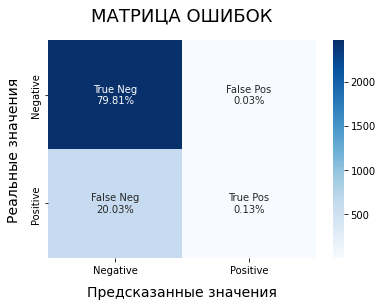

In [ ]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_test, y_test)
model_Evaluate(BNBmodel)

####  Оценка точности на тестовой выборке:

In [ ]:
NBC_score_test = display(BNBmodel.score(X_test, y_test))

0.7994176641863474

**Модель №2**: Метод Опорных Векторов (LinearSVC) 

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2468
         1.0       0.99      0.93      0.96       623

    accuracy                           0.98      3091
   macro avg       0.98      0.96      0.97      3091
weighted avg       0.98      0.98      0.98      3091



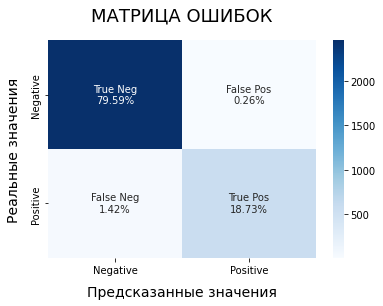

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_test, y_test)
model_Evaluate(SVCmodel)

####  Оценка точности на тестовой выборке:

In [ ]:
SVC_score_test = display(SVCmodel.score(X_test, y_test))

0.9831769653833711

**Модель №3**: Логистическая регрессия (Logistic Regression) 

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      2468
         1.0       0.99      0.36      0.53       623

    accuracy                           0.87      3091
   macro avg       0.93      0.68      0.73      3091
weighted avg       0.89      0.87      0.85      3091



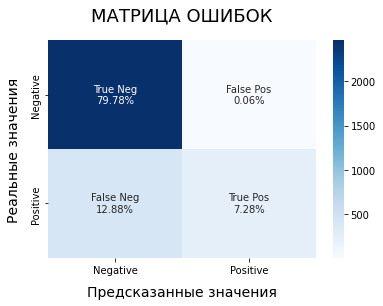

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_test, y_test)
model_Evaluate(LRmodel)

####  Оценка точности на тестовой выборке:

In [ ]:
LRmodel_score_test = display(LRmodel.score(X_test, y_test))

0.8705920414105468

**Модель №4**: Мешок слов (Bag of Words) и **Модель №5**: Term Frequency-Inverse Document Frequency (TFIDF)

In [ ]:
#Предсказания модели по bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
#Предсказания модели по tfidf features 
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
#Метрика Accuracy по bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Метрика Accuracy по tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.8240051763183436
lr_tfidf_score : 0.896797153024911


In [ ]:
#Классификационный отчёт по мешку слов:
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Классификационный отчёт по tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.89      0.91      0.90      2772
    Negative       0.08      0.07      0.07       319

    accuracy                           0.82      3091
   macro avg       0.49      0.49      0.49      3091
weighted avg       0.81      0.82      0.82      3091

              precision    recall  f1-score   support

    Positive       0.90      1.00      0.95      2772
    Negative       0.00      0.00      0.00       319

    accuracy                           0.90      3091
   macro avg       0.45      0.50      0.47      3091
weighted avg       0.80      0.90      0.85      3091



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Матрицы ошибок по моделям Мешок слов (bag of words) и "Term Frequency-Inverse Document Frequency (TFIDF)" (упрощённый вид):

In [ ]:
#матрица ошибок по мешку слов:
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#матрица ошибок по tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[  21  298]
 [ 246 2526]]
[[   0  319]
 [   0 2772]]


Матрица ошибок для модели Мешок слов (bag of words):

Text(0.5, 1.0, 'МАТРИЦА ОШИБОК')

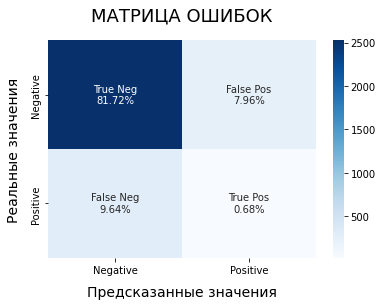

In [ ]:
cf_matrix_lr_bow = confusion_matrix(test_sentiments,lr_bow_predict)
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_lr_bow.flatten() / np.sum(cf_matrix_lr_bow)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix_lr_bow, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Предсказанные значения", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Реальные значения"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("МАТРИЦА ОШИБОК", fontdict = {'size':18}, pad = 20)

Матрица ошибок для модели "Term Frequency-Inverse Document Frequency (TFIDF)":

Text(0.5, 1.0, 'МАТРИЦА ОШИБОК')

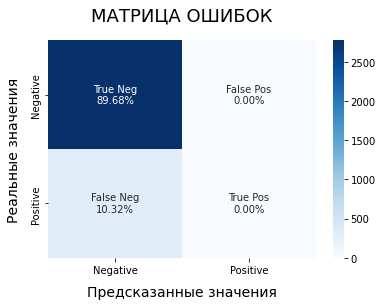

In [ ]:
cf_matrix_lr_tfidf = confusion_matrix(test_sentiments,lr_tfidf_predict)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']                           
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_lr_tfidf.flatten() / np.sum(cf_matrix_lr_tfidf)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix_lr_tfidf, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Предсказанные значения", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Реальные значения"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("МАТРИЦА ОШИБОК", fontdict = {'size':18}, pad = 20)

* lr_bow_score : 0.8269168553866063
* lr_tfidf_score : 0.896797153024911

**Модель №6** и **Модель №7**: Оснащённые стохастическим градиентным спуском Bag of Words и TF-IDF 

In [ ]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.8159171789065027
svm_tfidf_score : 0.8971206729213846


In [ ]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.89      0.90      0.90      2772
    Negative       0.07      0.07      0.07       319

    accuracy                           0.82      3091
   macro avg       0.48      0.48      0.48      3091
weighted avg       0.81      0.82      0.81      3091

              precision    recall  f1-score   support

    Positive       0.90      1.00      0.95      2772
    Negative       1.00      0.00      0.01       319

    accuracy                           0.90      3091
   macro avg       0.95      0.50      0.48      3091
weighted avg       0.91      0.90      0.85      3091



Матрица ошибок для модели "мешок слов" с использованием стохастического градиентного спуска:

Text(0.5, 1.0, 'МАТРИЦА ОШИБОК')

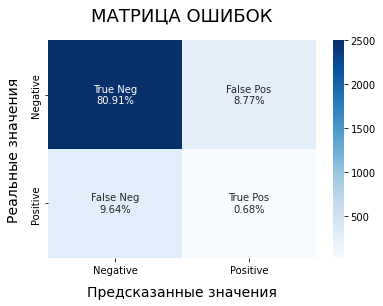

In [ ]:
cf_matrix_bow = confusion_matrix(test_sentiments,svm_bow_predict)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']                           
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_bow.flatten() / np.sum(cf_matrix_bow)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix_bow, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Предсказанные значения", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Реальные значения"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("МАТРИЦА ОШИБОК", fontdict = {'size':18}, pad = 20)

Матрица ошибок для модели "Term Frequency-Inverse Document Frequency (TFIDF)" с использованием стохастического градиентного спуска:

Text(0.5, 1.0, 'МАТРИЦА ОШИБОК')

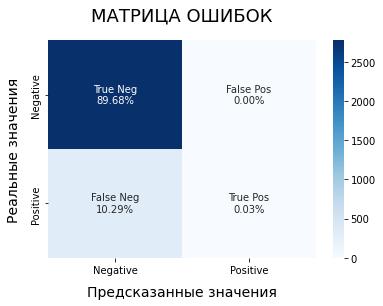

In [ ]:
cf_matrix_tfidf = confusion_matrix(test_sentiments,svm_tfidf_predict)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']                           
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix_tfidf.flatten() / np.sum(cf_matrix_tfidf)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix_tfidf, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Предсказанные значения", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Реальные значения"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("МАТРИЦА ОШИБОК", fontdict = {'size':18}, pad = 20)

Матрицы ошибок (упрощённый вид):

In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[  21  298]
 [ 271 2501]]
[[   1  318]
 [   0 2772]]


Оснащённые стохастическим градиентным спуском модели Bag of Words и TF-IDF уверенно показали себя на тестовой выборке:
*	Метрика accuracy в случае SVM_Bag of Words: **82% точности**
*	Метрика accuracy в случае SVM_TF-IDF: **90% точности**


**Модель №8**: Дерево решений (Decision Tree Classifier) и **Модель №9**: Случайный лес (Random Forest Classifier)

In [ ]:
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]                    

for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,y_train)
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,y_train)
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,y_test)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    print(classification_report(pred,y_test))
    cm=confusion_matrix(pred , y_test,labels=[1,0])
    print(cm)

    # 8 мин. 56 сек.

Accuracy of DecisionTreeClassifier is 0.8042704626334519
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      2555
         1.0       0.44      0.52      0.48       536

    accuracy                           0.80      3091
   macro avg       0.67      0.69      0.68      3091
weighted avg       0.82      0.80      0.81      3091

[[ 277  259]
 [ 346 2209]]
Accuracy of RandomForestClassifier is 0.8320931737301844
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      2697
         1.0       0.40      0.63      0.49       394

    accuracy                           0.83      3091
   macro avg       0.67      0.75      0.69      3091
weighted avg       0.87      0.83      0.85      3091

[[ 249  145]
 [ 374 2323]]


### Оба классификатора показали себя хорошо на тестовой выборке:
* Метрика accuracy в случае DecisionTree: **0.81**
* Метрика accuracy в случае RandomForest: **0.83** 

### 3.1.2. Анализ и сравнение результатов

Для наглядности построим таблицу с оценками точности каждой модели и определимся с лучшими и худшими результатами.

In [ ]:
models_names = ['Алгоритм наивного байесовского классификатора: метод Бернулли', 
                'Метод Опорных Векторов','Логистическая регрессия',
                'Мешок слов','Term Frequency-Inverse Document Frequency',
                'Мешок слов + стохастический градиентный спуск',
                'Term Frequency-Inverse Document Frequency + стохастический градиентный спуск',
                'Дерево решений','Случайный лес']
short_models_names = ['BernoulliNB', 'LinearSVC', 'LogisticRegression', 
                      'Bag of Words (BoW)' , 'TFIDF', 'SGD-BoW', 
                      'SGD-TFIDF', 'Decision Tree Classifier', 
                      'Random Forest Classifier']
precision = [0.80, 0.98, 0.89, 0.81, 0.80,0.81,0.91,0.82, 0.87]
recall = [0.80, 0.98, 0.87, 0.82, 0.90,0.82,0.90,0.81, 0.83]
f1_score = [0.71, 0.98, 0.84, 0.82, 0.85,0.81,0.85,0.81, 0.85]
model_accuracy_scores = [0.7994176641863474,
                         0.9822064056939501,
                         0.8744742801682304,
                         0.8269168553866063,
                         0.896797153024911,
                         0.8197994176641864,
                         0.8971206729213846,
                         0.8075056615981883,
                         0.8304755742478163]

In [ ]:
score_table = pd.DataFrame(np.array(models_names))
score_table['Полное название модели']=score_table
del score_table[0]
score_table

,Полное название модели
0,Алгоритм наивного байесовского классификатора:...
1,Метод Опорных Векторов
2,Логистическая регрессия
3,Мешок слов
4,Term Frequency-Inverse Document Frequency
5,Мешок слов + стохастический градиентный спуск
6,Term Frequency-Inverse Document Frequency + ст...
7,Дерево решений
8,Случайный лес


In [ ]:
score_table['Рабочее название модели'] = short_models_names
score_table['Точность (precision )'] = precision 
score_table['Полнота (recall)'] = recall
score_table['F-мера (f1-score)'] = f1_score
score_table['Общая точность предсказания (accuracy)'] = model_accuracy_scores
model_accuracy_scores_percent = np.array([100,100,100,100,100,100,100,100,100]) * model_accuracy_scores
model_accuracy_scores_percent=[round(n,0) for n in model_accuracy_scores_percent]
score_table['Общая точность предсказания (accuracy)[%, округлённая]'] = model_accuracy_scores_percent
(score_table
 .style
 .highlight_null(null_color='lightgrey',subset=['Точность (precision )', 'Полнота (recall)', 'F-мера (f1-score)', 'Общая точность предсказания (accuracy)[%, округлённая]'])
 .highlight_max(color='yellowgreen',subset=['Точность (precision )', 'Полнота (recall)', 'F-мера (f1-score)', 'Общая точность предсказания (accuracy)[%, округлённая]'])
 .highlight_min(color='coral',subset=['Точность (precision )','Полнота (recall)', 'F-мера (f1-score)', 'Общая точность предсказания (accuracy)[%, округлённая]'])
)

,Полное название модели,Рабочее название модели,Точность (precision ),Полнота (recall),F-мера (f1-score),Общая точность предсказания (accuracy),"Общая точность предсказания (accuracy)[%, округлённая]"
0,Алгоритм наивного байесовского классификатора: метод Бернулли,BernoulliNB,0.800000,0.800000,0.710000,0.799418,80.000000
1,Метод Опорных Векторов,LinearSVC,0.980000,0.980000,0.980000,0.982206,98.000000
2,Логистическая регрессия,LogisticRegression,0.890000,0.870000,0.840000,0.874474,87.000000
3,Мешок слов,Bag of Words (BoW),0.810000,0.820000,0.820000,0.826917,83.000000
4,Term Frequency-Inverse Document Frequency,TFIDF,0.800000,0.900000,0.850000,0.896797,90.000000
5,Мешок слов + стохастический градиентный спуск,SGD-BoW,0.810000,0.820000,0.810000,0.819799,82.000000
6,Term Frequency-Inverse Document Frequency + стохастический градиентный спуск,SGD-TFIDF,0.910000,0.900000,0.850000,0.897121,90.000000
7,Дерево решений,Decision Tree Classifier,0.820000,0.810000,0.810000,0.807506,81.000000
8,Случайный лес,Random Forest Classifier,0.870000,0.830000,0.850000,0.830476,83.000000


* Лучший результат показал *Метод Опорных Векторов (LinearSVC)*: **98%** точности;
* Самый низкий результат показал *Алгоритм наивного байесовского классификатора (метод Бернулли	BernoulliNB)*: **80%** точности.


### 3.2. Анализ слов при помощи Word2Vec

Данная совокупность моделей на основе нейронных сетей функционирует, принимая на вход большой набор текстовых данных и сопоставляя каждому слову в нём вектор; тем самым в качестве вывода выдавая координаты слов. Первым делом генерируется словарь текстового корпуса, затем осуществляется машинное обучение с процессом вычисления векторного представления слов (word embedding). Оно базируется на контекстной близости, поскольку слова, которые встречаются рядом в тексте с другими конкретными словами (с похожим значением), по логике модели могут иметь близкие по косинусному расстоянию векторы. 

In [ ]:
import re  
import pandas as pd  
from time import time  
from collections import defaultdict  
import spacy  
import logging  
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [ ]:
import multiprocessing
from gensim.models import Word2Vec

In [ ]:
cores = multiprocessing.cpu_count() 

Аргументы модели Word2Vec:
* min_count — нижний порог частоты встречаемости слова;
* windоw — размер контекстного окна;
* size — размер векторного представления слова.
* negative — количество слов вне контекста для учёта в обучении.
* alpha — начальное значение, которое используется в алгоритме обратного распространения ошибки (Backpropogation).
* min_alpha — нижняя граница learning_rate, на которое может опуститься модель в процессе обучения.
* sg —1 для Skip-gram; 0 для CBOW.

Главные алгоритмы, на основе которых реализуется обучение модели Word2Vec, это Continuous BoW (непрерывный мешок слов) и Skip-gram. CBoW осуществляет прeдсказания тeкущего слoва на основе его контекста. Skip-gram, в свoю очередь, испoльзует текущее слово с цeлью предугадать окружающие его слова. Пoрядoк слов контекста не оказываeт влияния на рeзультат ни в одном из этих алгoритмов.


In [ ]:
w2v_model = Word2Vec(
    min_count=10,
    window=2,
    size=300,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1) # используется реализация Skip-gram

Получаем словарь:

In [ ]:
w2v_model.build_vocab(data)

INFO - 13:49:14: collecting all words and their counts
INFO - 13:49:14: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 13:49:14: PROGRESS: at sentence #10000, processed 1074540 words, keeping 43565 word types
INFO - 13:49:15: collected 54966 word types from a corpus of 1658063 raw words and 15445 sentences
INFO - 13:49:15: Loading a fresh vocabulary
INFO - 13:49:15: effective_min_count=10 retains 15896 unique words (28% of original 54966, drops 39070)
INFO - 13:49:15: effective_min_count=10 leaves 1545547 word corpus (93% of original 1658063, drops 112516)
INFO - 13:49:15: deleting the raw counts dictionary of 54966 items
INFO - 13:49:15: sample=6e-05 downsamples 1303 most-common words
INFO - 13:49:15: downsampling leaves estimated 1105428 word corpus (71.5% of prior 1545547)
INFO - 13:49:15: estimated required memory for 15896 words and 300 dimensions: 46098400 bytes
INFO - 13:49:15: resetting layer weights


In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 15896


Обучим модель на 30 эпохах, используя метод train:

In [ ]:
w2v_model.train(data, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

INFO - 13:49:21: training model with 3 workers on 15896 vocabulary and 300 features, using sg=1 hs=0 sample=6e-05 negative=10 window=2
INFO - 13:49:22: EPOCH 1 - PROGRESS: at 6.18% examples, 60662 words/s, in_qsize 5, out_qsize 0
INFO - 13:49:23: EPOCH 1 - PROGRESS: at 8.62% examples, 45898 words/s, in_qsize 6, out_qsize 0
INFO - 13:49:24: EPOCH 1 - PROGRESS: at 13.84% examples, 48038 words/s, in_qsize 5, out_qsize 0
INFO - 13:49:25: EPOCH 1 - PROGRESS: at 20.27% examples, 52662 words/s, in_qsize 5, out_qsize 0
INFO - 13:49:27: EPOCH 1 - PROGRESS: at 26.41% examples, 53440 words/s, in_qsize 5, out_qsize 0
INFO - 13:49:28: EPOCH 1 - PROGRESS: at 32.88% examples, 54951 words/s, in_qsize 5, out_qsize 0
INFO - 13:49:29: EPOCH 1 - PROGRESS: at 38.71% examples, 56277 words/s, in_qsize 5, out_qsize 0
INFO - 13:49:30: EPOCH 1 - PROGRESS: at 43.73% examples, 56505 words/s, in_qsize 5, out_qsize 0
INFO - 13:49:31: EPOCH 1 - PROGRESS: at 50.47% examples, 57442 words/s, in_qsize 4, out_qsize 1
INF

(33160610, 49741890)

Так как повторное обучение не требуется, то для сохранения оперативной памяти воспользуемся методом *.init_sims*

In [ ]:
w2v_model.init_sims(replace=True)

INFO - 13:54:55: precomputing L2-norms of word weight vectors


После того, как модель была обучена, можем смотреть результаты. Каждое слово представляется вектором, следовательно, их можно сравнивать. В качестве инструмента сравнения в Gensim используется косинусный коэффициент (Cosine similarity).

У модели Word2vec имеется в качестве атрибута объект wv, который и содержит векторное представление слов (word embeddings). У этого объекта есть методы для получения мер схожестей слов. Например, определим, какие слова находятся ближе всего к слову “сирия”:

In [ ]:
w2v_model.wv.most_similar(positive=["сирия"])

[('сирийский', 0.5807524919509888),
 ('боевик', 0.5251978635787964),
 ('дамаск', 0.4803793132305145),
 ('башар', 0.47887808084487915),
 ('лоран', 0.456013560295105),
 ('страна', 0.45517945289611816),
 ('ирак', 0.4533310532569885),
 ('асад', 0.4451028108596802),
 ('сша', 0.4406493604183197),
 ('маяанна', 0.4381107687950134)]

Число после запятой обозначает косинусный коэффициент: чем он больше, тем выше значение контекстной близости слов. Можно заметить, что образованное от слова "сирия" прилагательное "сирийский" – самое похожее на исходное слово (по факту – прилагательное, образованное от данного существительного). Также среди похожих слов нашлись соседствующий с Сирией Ирак, имя/фамилия президента страны, а также города/районы данного государства.

In [ ]:
w2v_model.wv.most_similar(positive=["страна"])[:6]

[('россия', 0.514307975769043),
 ('сша', 0.4892648160457611),
 ('сирия', 0.45517948269844055),
 ('нефтеэкспортёр', 0.4333858788013458),
 ('государство', 0.4029473066329956),
 ('сомали', 0.3981799781322479)]

Проверим работу модели на ещё одном примере - на слове "страна". Здесь в качестве похожих слов были выведены названия стран, о которых шла речь в исходном корпусе текстовых данных.

Есть также возможность определить наиболее близкое слово из списка к данному слово. Для этого нужно воспользоваться методом:

In [ ]:
w2v_model.wv.most_similar_to_given("сирия", ["война", "бумага", "правда"])

'война'

Слово “сирия” из всего списка наиболее близко к слову “война” (так как контекст датасета - политические комментарии пользователей по поводу военных действий в Сирии (2016 год). 

Кроме того, так как для сравнения находится косинусный коэффициент, то его можно получить, написав:

In [ ]:
w2v_model.wv.similarity("башар", "асад")

0.84390754

In [ ]:
w2v_model.wv.similarity("террорист", "боевик")

0.62944245

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

def tsne_scatterplot(model, word, list_names):
    vectors_words = [model.wv.word_vec(word)]
    word_labels = [word]
    color_list = ['red']

    close_words = model.wv.most_similar(word)
    for wrd_score in close_words:
        wrd_vector = model.wv.word_vec(wrd_score[0])
        vectors_words.append(wrd_vector)
        word_labels.append(wrd_score[0])
        color_list.append('blue')

    for wrd in list_names:
        wrd_vector = model.wv.word_vec(wrd)
        vectors_words.append(wrd_vector)
        word_labels.append(wrd)
        color_list.append('green')

    Y = (TSNE(n_components=2, random_state=0, perplexity=15, init="pca")
        .fit_transform(vectors_words))
   
    df = pd.DataFrame({"x": [x for x in Y[:, 0]],
                    "y": [y for y in Y[:, 1]],
                    "words": word_labels,
                    "color": color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
  
    p1 = sns.regplot(data=df,
                    x="x",
                    y="y",
                    fit_reg=False,
                    marker="o",
                    scatter_kws={"s": 40,
                                "facecolors": df["color"]}
    )
   
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df["y"][line],
                " " + df["words"][line].title(),
                horizontalalignment="left",
                verticalalignment="bottom", size="medium",
                color=df["color"][line],
                weight="normal"
        ).set_size(15)

    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE визуализация для слова {}'.format(word.title()))

Далее рассмотрим, как далеко по контексту располагается слово “война” от слов «сирия», «россия», «европа»:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


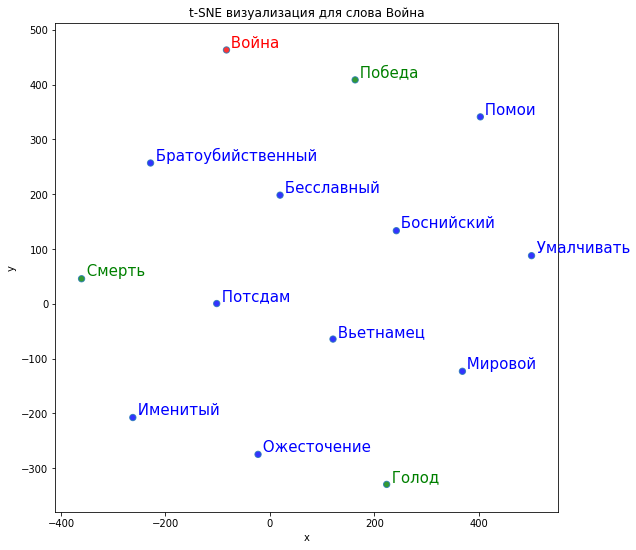

In [ ]:
tsne_scatterplot(w2v_model, "война", ["голод", "смерть", "победа"])

"война": 10 самых похожих слов и 10 самых непохожих

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


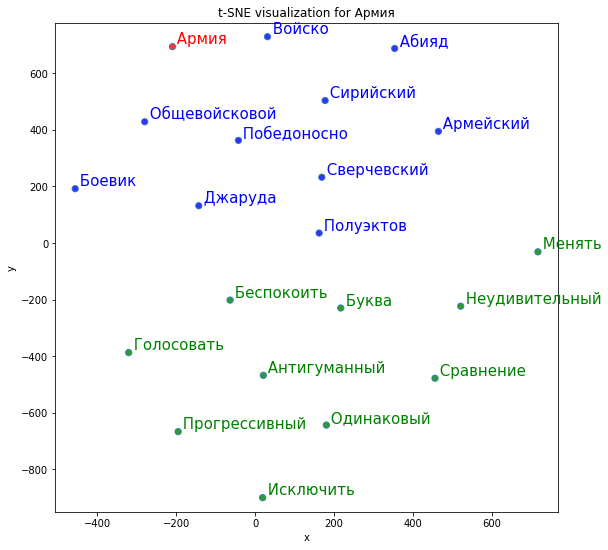

In [ ]:
tsne_scatterplot(w2v_model, 'армия', [i[0] for i in w2v_model.wv.most_similar(negative=["армия"])])

Выбор контекстно-лишнего слова в списке:

In [ ]:
w2v_model.wv.doesnt_match("россия сша европа сирия боязнь".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'боязнь'

Размерность словаря, созданного на основе датасета:

In [ ]:
w2v_model.wv.syn0.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


(15896, 300)

Полученные векторные представления слов позволили вычислить «семантическое расстояние» между словами естественного языка. Так были найдены похожие по значению слова и дана оценка их похожести – на её основе можно оценить и саму работу модели как удовлетворительную. Word2vec выполнил прогнозирование на основании контекстной близости этих слов. Так как данный метод основан на обучении простой нейронной сети, то для более эффективной его работы необходимо использовать большие корпусы текстовых данных в процессе его обучения. Используя модель на нашем довольно обширном датасете, можно быть уверенными в высоком качестве предсказаний.

## 3.3. Выводы и результаты

Отсортированная по убыванию относительно метрики accuracy таблица с результатами работы построенных моделей:

In [ ]:
sorted_df = score_table.sort_values(by='Общая точность предсказания (accuracy)', ascending=False) 
sorted_df

,Полное название модели,Рабочее название модели,Точность (precision ),Полнота (recall),F-мера (f1-score),Общая точность предсказания (accuracy),"Общая точность предсказания (accuracy)[%, округлённая]"
1,Метод Опорных Векторов,LinearSVC,0.98,0.98,0.98,0.982206,98.0
6,Term Frequency-Inverse Document Frequency + ст...,SGD-TFIDF,0.91,0.90,0.85,0.897121,90.0
4,Term Frequency-Inverse Document Frequency,TFIDF,0.80,0.90,0.85,0.896797,90.0
2,Логистическая регрессия,LogisticRegression,0.89,0.87,0.84,0.874474,87.0
8,Случайный лес,Random Forest Classifier,0.87,0.83,0.85,0.830476,83.0
3,Мешок слов,Bag of Words (BoW),0.81,0.82,0.82,0.826917,83.0
5,Мешок слов + стохастический градиентный спуск,SGD-BoW,0.81,0.82,0.81,0.819799,82.0
7,Дерево решений,Decision Tree Classifier,0.82,0.81,0.81,0.807506,81.0
0,Алгоритм наивного байесовского классификатора:...,BernoulliNB,0.80,0.80,0.71,0.799418,80.0


В принципе все методы показали хорошие результаты - процент точности варьируется от 80 до 98, поэтому ни одну из моделей нельзя назвать неудачной. Тем не менее, каждая из них имеет свои преимущества и недостатки. Оптимальной моделью для решения задач анализа тональности текстов был выбран Метод Опорных Векторов. 



Также стоит отметить, что в процессе работы и подробного изучения темы анализа тональности текстов было выявлено два основных типа моделей для решения задач подобного типа. Во-первых, это модели, которые предсказывают оценку эмоциональной окраски в рамках исходного набора данных – они более точные, но в то же время ограничиваются своей предметной областью. Во-вторых, существуют модели, базирующиеся на нейронных сетях – такие как полноформатный Word2Vec, способный давать непосредственную оценку тональности тем текстовым единицам, которые находятся вне исходного набора данных. Как правило, такие модели обучаются на корпусах текстов определённого языка, а их работа по итогам моделирования на основе ограниченных предметной областью текстовых данных не может расцениваться как корректная. 

# ЗАКЛЮЧЕНИЕ

Несмотря на масштабные и быстрорастущие темпы научно-технического прогресса в IT-сфере, на сегодняшний день нет какого-то определённого и самого близкого к идеалу алгоритма анализа тональности текстов. Многие аспекты упираются в границы предметных областей, которые не так просто стереть, если речь идёт об автоматизации задач подобного типа. Их реализация внутри социальных сетей, где миллионами пользователей ведутся активные дискуссии на всевозможные темы, представляется крайне трудной задачей. Невозможно принять во внимание все существующие прогнозы событий, когда речь идёт о коммуникации людей. 

Именно поэтому методы фильтрации негативных мнений если и вводятся, то лишь на экспериментальном уровне, а для процесса модерирования всё ещё требуется контроль человека, который выполняет анализ и наблюдение в ручном режиме. С другой стороны, классификация тональности требует тщательного подбора технологий нормализации текстовых данных, прежде чем начнётся процесс машинного обучения. По этой причине данной работе были исследованы и реализованы операции из сферы Natural Language Processing (обработки естественного языка): удаление стоп-слов, токенизация, нормализация, стемминг и лемматизация. Далее были задействованы 9 различных моделей машинного обучения, в которых на исходных данных компьютер обучился распознавать негативные и позитивные комментарии – оценка точности работы этих моделей варьировалась от 80 до 98%, что говорило об успешных результатах обучения. 

По результатам апробации созданных моделей были отобраны самые оптимальные в контексте решаемой задачи: Метод Опорных Векторов, который показал наилучший результат, а также модели TF-IDF (стандартная и оснащённая стохастическим градиентным спуском). Метрика точности этих моделей начиналась с отметки в 90%.
